In [3]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="/root/autodl-tmp/generated_dataset")
dataset = dataset['train']

Resolving data files:   0%|          | 0/2000 [00:00<?, ?it/s]

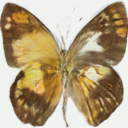

In [6]:
# 0 蝴蝶 1 花
dataset[0]['image']

In [13]:
from datasets import load_from_disk

dataset = load_from_disk(r'/root/autodl-fs/dataset/huggan_smithsonian_butterflies_subset')
dataset = dataset['train']
train_dataset, test_dataset = dataset.train_test_split(test_size=0.3, shuffle=True)

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_url', 'image_alt', 'id', 'name', 'scientific_name', 'gender', 'taxonomy', 'region', 'locality', 'date', 'usnm_no', 'guid', 'edan_url', 'source', 'stage', 'image', 'image_hash', 'sim_score'],
        num_rows: 1000
    })
})

# Create Dataset

In [2]:
from classification.my_dataset import get_cat_vs_dog

train_dataset, val_dataset, test_dataset, num_of_category = get_cat_vs_dog()

max_epochs = 16

In [4]:
dataset = train_dataset.filter(lambda x: x["label"] == 0)

Filter:   0%|          | 0/18728 [00:00<?, ? examples/s]

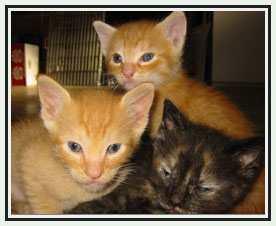

In [7]:
dataset[9]["image"]

In [2]:
from classification.net import res18_preprocess


def transform(examples):
    new_img_list = []
    for item in examples["image"]:
        if item.mode in ["L", "CMYK"]:
            item = item.convert("RGB")
        new_img_list.append(res18_preprocess(item))
    examples["image"] = new_img_list
    return examples


train_dataset.set_transform(transform)
val_dataset.set_transform(transform)
test_dataset.set_transform(transform)

# Create DataLoader

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=3)
val_dataloader = DataLoader(val_dataset, batch_size=64, num_workers=3)
test_dataloader = DataLoader(test_dataset, batch_size=64, num_workers=3)

# Set Environment

In [4]:
import torch
import os
import wandb
from pytorch_lightning.loggers import WandbLogger

torch.set_float32_matmul_precision("high")

os.environ["https_proxy"] = "http://172.20.0.113:12798"
os.environ["http_proxy"] = "http://172.20.0.113:12798"
os.environ["WANDB_NOTEBOOK_NAME"] = "classification"

wandb.login()
# a21ecfe3d3c08ddc3e7f628f6005f63c3048cb0a

wandb_logger = WandbLogger()

wandb: Currently logged in as: hozhvf1. Use `wandb login --relogin` to force relogin


# Train the Model

In [5]:
from classification.net import Res18
from classification.lightning_model import Classifier
import lightning.pytorch as pl


model = Classifier(Res18, num_of_category)

trainer = pl.Trainer(max_epochs=max_epochs, logger=wandb_logger)
trainer.fit(
    model=model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader
)

trainer.test(model=model, dataloaders=test_dataloader)

wandb.finish()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | net            | Res18              | 11.2 M
1 | train_accuracy | MulticlassAccuracy | 0     
2 | val_accuracy   | MulticlassAccuracy | 0     
3 | test_accuracy  | MulticlassAccuracy | 0     
------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=16` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9397549629211426     │
│         test_loss         │    0.18792292475700378    │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇███
test_acc,▁
test_loss,▁
train_acc,▁▃▄▅▅▆▆▇▇▇▇█████
train_loss,█▇▆▅▄▄▃▃▂▂▂▂▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇█████
val_acc,▁▃▃▄▆▆▇▆▇▇█▇██▇█
val_loss,██▆▅▃▄▂▄▂▂▂▂▁▁▂▂
epoch,16
test_acc,0.93975
test_loss,0.18792
